# Testing the reconstruction of our previous models

- GCF_902809985.1 - BL-3 -> original model: iIB931.xml
- GCF_902809935.1 - BL-4 -> original model: iIB600.xml
- GCF_000022065.1 - R. cellulolyticum -> orginial model: iIB746


In [1]:
import reframed
import pandas as pd
import matplotlib_venn

In [2]:
import pandas as pd

### Load universal model additions

In [3]:
rxns_add = pd.read_csv("~/universal_model_extension/output/universal_model_changes/rxns_add.tsv",sep="\t")
rxns_add

,rxn,origin,part
0,R_EX_XAXX_e,iIB746,2.1
1,R_QLQGabc,iIB746,2.1
2,R_BUTt,iIB933,2.1
3,R_PPAdiff,iIB600,2.1
4,R_XYLqqqg,iIB746,2.1
...,...,...,...
63,R_GHAa23xx2,iIB746,2.1
64,R_GHAxa23x,iIB746,2.1
65,R_QQQGabc,iIB746,2.1
66,R_Acabc,iIB600,2.1


In [4]:
bigg_gprs = pd.read_csv("/Users/idunmariaburgos/universal_model_extension/output/bigg_gprs.csv")

In [5]:
bigg_gprs

,gene,protein,reaction,model
0,G_ABAYE_RS01830,P_ABAYE_RS01830,R_HCO3E,iCN718
1,G_ABAYE_RS14015,P_ABAYE_RS14015,R_HCO3E,iCN718
2,G_ABAYE_RS07335,P_ABAYE_RS07335+ABAYE_RS07340+ABAYE_RS07345+AB...,R_CYTBD,iCN718
3,G_ABAYE_RS07340,P_ABAYE_RS07335+ABAYE_RS07340+ABAYE_RS07345+AB...,R_CYTBD,iCN718
4,G_ABAYE_RS07345,P_ABAYE_RS07335+ABAYE_RS07340+ABAYE_RS07345+AB...,R_CYTBD,iCN718
...,...,...,...,...
108288,G_s0001,P_s0001,R_HXAdiff,iIB600
108289,G_s0001,P_s0001,R_IBTdiff,iIB600
108290,G_s0001,P_s0001,R_PTAdiff,iIB933
108291,G_s0001,P_s0001,R_HXAdiff,iIB933


In [7]:
rxns_list = list(rxns_add["rxn"].values)
models_list = [models.split(",") for models in rxns_add["origin"].values]
rxns_dict = dict(zip(rxns_list, models_list))

### Check models

#### R. cellulolyticum

In [9]:
rxns_origin = list(set(bigg_gprs[bigg_gprs["model"]=="iIB746"]["reaction"].values))

model_rcel = reframed.load_cbmodel("output/GEMs_test/RCell_H10_test.xml")
rxns_carve = list(model_rcel.reactions.keys())

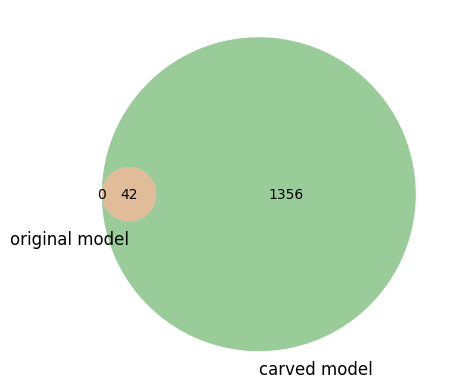

In [10]:
matplotlib_venn.venn2([set(rxns_origin),set(rxns_carve)],set_labels=["original model","carved model"])

#### Clostridia BL-3

It is missing the transporter because this one was not in the refseq system (does not have gene starting with WP_ but with CAB_).

In [11]:
rxns_origin = list(set(bigg_gprs[bigg_gprs["model"]=="iIB933"]["reaction"].values))

model_bl3 = reframed.load_cbmodel("output/GEMs_test/clostridiaBL3_test.xml")
rxns_carve = list(model_bl3.reactions.keys())

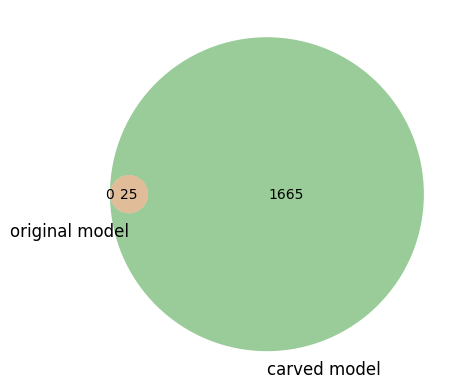

In [12]:
matplotlib_venn.venn2([set(rxns_origin),set(rxns_carve)],set_labels=["original model","carved model"])

In [13]:
set(rxns_origin)-set(rxns_carve)

set()

In [14]:
env = reframed.Environment.complete(model_bl3)
sol = reframed.pFBA(model_bl3, constraints=env)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-14


In [15]:
model_bl3.get_metabolite_reactions("M_fdxo_2_2_c")

['R_POR_syn',
 'R_FNRR3_1',
 'R_VOR2bE_1',
 'R_BCD3',
 'R_BCD1',
 'R_FRROX',
 'R_BCD2']

#### Clostridia BL-4

It is missing the transporter because this one was not in the refseq system (does not have gene starting with WP_ but with CAB_).

In [16]:
rxns_origin = list(set(bigg_gprs[bigg_gprs["model"]=="iIB600"]["reaction"].values))

model_bl4 = reframed.load_cbmodel("output/GEMs_test/clostridiaBL4_test.xml")
rxns_carve = list(model_bl4.reactions.keys())

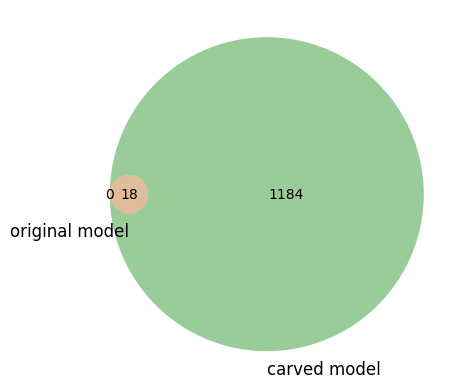

In [17]:
matplotlib_venn.venn2([set(rxns_origin),set(rxns_carve)],set_labels=["original model","carved model"])

In [18]:
set(rxns_origin)-set(rxns_carve)

set()

In [19]:
model_bl4_orig = reframed.load_cbmodel("/Users/idunmariaburgos/universal_model_extension/input/curated_models_newId/iIB600.xml")

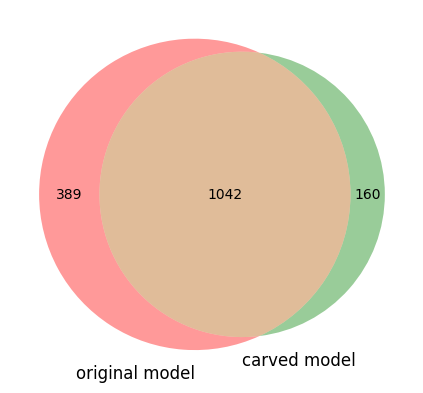

In [20]:
matplotlib_venn.venn2([set(model_bl4_orig.reactions.keys()),set(model_bl4.reactions.keys())],set_labels=["original model","carved model"])

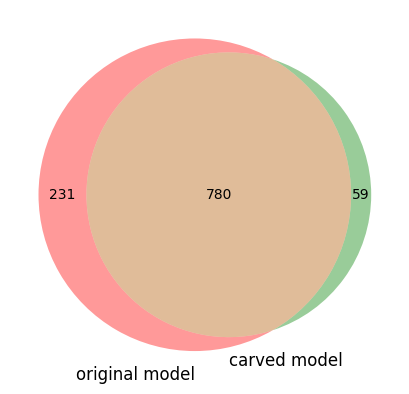

In [21]:
matplotlib_venn.venn2([set(model_bl4_orig.metabolites.keys()),set(model_bl4.metabolites.keys())],set_labels=["original model","carved model"])

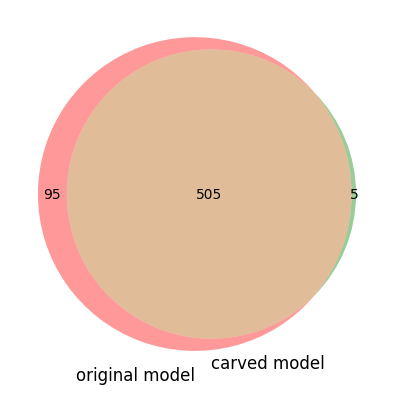

In [22]:
matplotlib_venn.venn2([set(model_bl4_orig.genes.keys()),set(model_bl4.genes.keys())],set_labels=["original model","carved model"])

In [23]:
model_rcel_orig = reframed.load_cbmodel("/Users/idunmariaburgos/universal_model_extension/input/curated_models_newId/iIB746.xml")

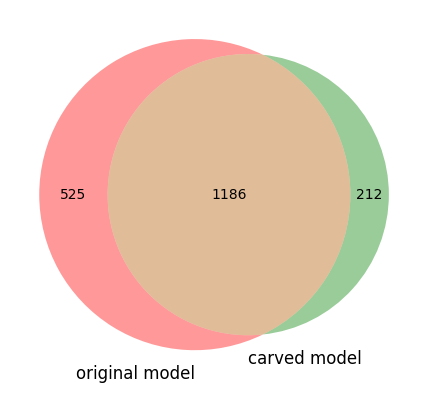

In [24]:
matplotlib_venn.venn2([set(model_rcel_orig.reactions.keys()),set(model_rcel.reactions.keys())],set_labels=["original model","carved model"]);

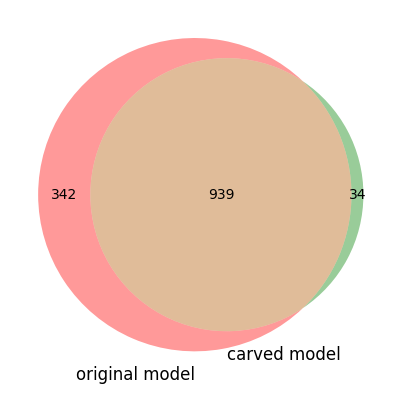

In [25]:
matplotlib_venn.venn2([set(model_rcel_orig.metabolites.keys()),set(model_rcel.metabolites.keys())],set_labels=["original model","carved model"]);

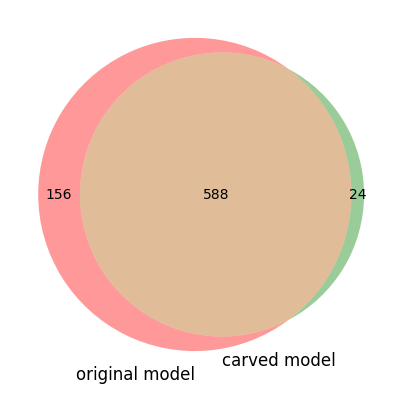

In [26]:
matplotlib_venn.venn2([set([gene.replace("G_","") for gene in model_rcel_orig.genes.keys()]),set([gene.replace("G_","") for gene in model_rcel.genes.keys()])],set_labels=["original model","carved model"]);


In [27]:
rcel_gene_stats = pd.read_csv("output/GEMs_test/RCell_H10_test_gene_scores.tsv",sep="\t")
rcel_gene_stats


,query_gene,BiGG_gene,score,gene,protein,reaction,model
0,NaN,iCN718.ABAYE_RS01830,NaN,G_ABAYE_RS01830,P_ABAYE_RS01830,R_HCO3E,iCN718
1,NaN,iCN718.ABAYE_RS14015,NaN,G_ABAYE_RS14015,P_ABAYE_RS14015,R_HCO3E,iCN718
2,NaN,iCN718.ABAYE_RS07335,NaN,G_ABAYE_RS07335,P_ABAYE_RS07335+ABAYE_RS07340+ABAYE_RS07345+AB...,R_CYTBD,iCN718
3,NaN,iCN718.ABAYE_RS07340,NaN,G_ABAYE_RS07340,P_ABAYE_RS07335+ABAYE_RS07340+ABAYE_RS07345+AB...,R_CYTBD,iCN718
4,NaN,iCN718.ABAYE_RS07345,NaN,G_ABAYE_RS07345,P_ABAYE_RS07335+ABAYE_RS07340+ABAYE_RS07345+AB...,R_CYTBD,iCN718
...,...,...,...,...,...,...,...
47185,spontaneous,iIB600.s0001,0.0,G_s0001,P_s0001,R_HXAdiff,iIB600
47186,spontaneous,iIB600.s0001,0.0,G_s0001,P_s0001,R_IBTdiff,iIB600
47187,spontaneous,iIB933.s0001,0.0,G_s0001,P_s0001,R_PTAdiff,iIB933
47188,spontaneous,iIB933.s0001,0.0,G_s0001,P_s0001,R_HXAdiff,iIB933


In [28]:
genes_not_in_model = list(set([gene.replace("G_","") for gene in model_rcel_orig.genes.keys()])-set([gene.replace("G_","") for gene in model_rcel.genes.keys()]))

genes_not_in_model = [gene.replace("G_","") for gene in genes_not_in_model]
genes_not_in_model = [gene.replace("_1",".1") for gene in genes_not_in_model]

In [29]:

rcel_gene_stats[rcel_gene_stats["query_gene"].isin(genes_not_in_model)]

,query_gene,BiGG_gene,score,gene,protein,reaction,model
163,WP_015925543.1,iCN718.ABAYE_RS17405,112.5,G_ABAYE_RS17405,P_ABAYE_RS17405,R_PGLYCP,iCN718
1154,WP_015925219.1,iYO844.BSU23610,144.8,G_BSU23610,P_BSU23610,R_ADPRDP,iYO844
1313,WP_015925108.1,iYO844.BSU32000,124.8,G_BSU32000,P_BSU32000,R_DHBD,iYO844
2632,WP_015924192.1,iCN900.CD630_15430,282.0,G_CD630_15430,P_CD630_15430,R_ACPPD,iCN900
3419,WP_015925432.1,iCN900.CD630_24640,338.2,G_CD630_24640,P_CD630_24640,R_CPPPGO2,iCN900
3420,WP_242651714.1,iCN900.CD630_27410,399.1,G_CD630_27410,P_CD630_27410,R_CPPPGO2,iCN900
3484,WP_041706909.1,iCN900.CD630_19040,253.1,G_CD630_19040,P_CD630_19040+CD630_29890+CD630_29900,R_NO3abc,iCN900
3627,WP_015925219.1,iHN637.CLJU_RS05505,156.8,G_CLJU_RS05505,P_CLJU_RS05505,R_ADPRDP,iHN637
5801,WP_015924526.1,iML1515.b2091,253.1,G_b2091,P_b2091,R_GLTPD,iML1515
5968,WP_015924795.1,iML1515.b2738,109.0,G_b2738,P_b2738,R_FCLPA,iML1515


In [30]:
RCell_H10_test_protein_scores = pd.read_csv("output/GEMs_test/RCell_H10_test_protein_scores.tsv",sep="\t")
RCell_H10_test_protein_scores


,protein,reaction,model,GPR,score
0,P_100,R_ADA,iAT_PLT_636,NaN,0.0
1,P_100,R_DADA,iAT_PLT_636,NaN,0.0
2,P_100043349,R_GAPD,iMM1415,NaN,0.0
3,P_100678,R_PSP_L,iMM1415,NaN,0.0
4,P_100689028,R_DHFR,iCHOv1,NaN,0.0
...,...,...,...,...,...
38436,P_yjjL,R_GALCTNLt2pp,iSDY_1059,NaN,0.0
38437,P_yjjL,R_GALCTNLt2pp,iSSON_1240,NaN,0.0
38438,P_yjjL,R_GALCTNLt2pp,iSbBS512_1146,NaN,0.0
38439,P_yliF,R_DGUNC,iSbBS512_1146,NaN,0.0


In [31]:
RCell_H10_test_protein_scores[RCell_H10_test_protein_scores["GPR"].isin(genes_not_in_model)]

,protein,reaction,model,GPR,score
2733,P_ABAYE_RS17405,R_PGLYCP,iCN718,WP_015925543.1,112.500000
3318,P_BSU23610,R_ADPRDP,iYO844,WP_015925219.1,144.800000
3531,P_BSU32000,R_DHBD,iYO844,WP_015925108.1,124.800000
4190,P_CD630_15430,R_ACPPD,iCN900,WP_015924192.1,282.000000
4339,P_CD630_19040+CD630_29890+CD630_29900,R_NO3abc,iCN900,WP_041706909.1,84.366667
4514,P_CD630_24640,R_CPPPGO2,iCN900,WP_015925432.1,338.200000
4603,P_CD630_27410,R_CPPPGO2,iCN900,WP_242651714.1,399.100000
5038,P_CLJU_RS05505,R_ADPRDP,iHN637,WP_015925219.1,156.800000
7098,P_HP0381,R_PPPGO,iIT341,WP_015926714.1,132.500000
8680,P_KPN_01603,R_FCLPA,iYL1228,WP_015924795.1,119.800000
